<a href="https://colab.research.google.com/github/ysg1202/automoblile/blob/main/0715_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# üîß ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
!pip install tensorflow matplotlib pillow numpy

In [ ]:
# üì¶ ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

In [ ]:
def create_simple_cnn():
    """
    ÍµêÏú°Ïö© Í∞ÑÎã®Ìïú CNN Î™®Îç∏ ÏÉùÏÑ±
    """
    model = tf.keras.Sequential([
        # Ï≤´ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)), # 16Í∞úÏùò 3√ó3 ÌïÑÌÑ∞ ÏÇ¨Ïö©
        tf.keras.layers.MaxPooling2D(2, 2),

        # Îëê Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # ÌïÑÌÑ∞ Ïàò Ï¶ùÍ∞Ä ‚Üí ÌäπÏßï Ï∂îÏ∂úÏùÑ Îçî ÍπäÍ≤å
        tf.keras.layers.MaxPooling2D(2, 2),

        # ÏÑ∏ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # Îçî Î≥µÏû°Ìïú Ìå®ÌÑ¥ÏùÑ Ï∂îÏ∂ú
        tf.keras.layers.MaxPooling2D(2, 2),

        # Flatten & Dense Î†àÏù¥Ïñ¥, Î∂ÑÎ•òÎã®Í≥Ñ
        tf.keras.layers.Flatten(), # 3D ‚Üí 1DÎ°ú ÌéºÏπ®
        tf.keras.layers.Dense(128, activation='relu'), # ÎÖ∏Îìú 128Í∞ú
        tf.keras.layers.Dropout(0.5), # ÌïôÏäµ Ïãú Î¨¥ÏûëÏúÑÎ°ú 50%Ïùò Îâ¥Îü∞ÏùÑ ÎÅàÎã§ -> Í≥ºÏ†ÅÌï© Î∞©ÏßÄ, ÌäπÏ†ï Îâ¥Îü∞ÏóêÎßå ÏùòÏ°¥ÌïòÏßÄ ÏïäÎèÑÎ°ù Í∞ïÏ†ú, Ï∂îÎ°†(inference)Ìï† ÎïåÎäî Ï†ÅÏö©ÎêòÏßÄ ÏïäÏùå
        tf.keras.layers.Dense(3, activation='softmax')  # 3 classes: Animal/Car/Other
    ])

    # Î™®Îç∏ Ïª¥ÌååÏùº
    model.compile(
        optimizer='adam', # Ï§ëÏöî
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("üß† CNN Î™®Îç∏ ÏÉùÏÑ± ÏôÑÎ£å!")
    return model

üß† create_simple_cnn Ìï®Ïàò ÏÑ§Î™Ö

Ïù¥ Ìï®ÏàòÎäî ÍµêÏú°Ïö©ÏúºÎ°ú ÏÑ§Í≥ÑÎêú Í∞ÑÎã®Ìïú CNN(Ìï©ÏÑ±Í≥± Ïã†Í≤ΩÎßù) Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÏó¨ Î∞òÌôòÌï©ÎãàÎã§.
ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Îäî 64x64 RGB(3Ï±ÑÎÑê)Ïù¥Î©∞, Ï¥ù 3Í∞úÏùò ÌÅ¥ÎûòÏä§(Ïòà: Animal, Car, Other)Î•º Î∂ÑÎ•òÌï©ÎãàÎã§.

üì¶ Î™®Îç∏ Íµ¨ÏÑ± ÏöîÏïΩ:
1. Conv2D + MaxPooling2D (3Ìöå Î∞òÎ≥µ) ‚Üí Ïù¥ÎØ∏ÏßÄ ÌäπÏßï Ï∂îÏ∂ú
2. Flatten ‚Üí 3Ï∞®Ïõê Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º 1Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
3. Dense(128) ‚Üí ÏùÄÎãâÏ∏µ: Î∂ÑÎ•ò ÌåêÎã®Ïóê ÌïÑÏöîÌïú Í≥ÑÏÇ∞ ÏàòÌñâ (ReLU)
4. Dropout(0.5) ‚Üí Í≥ºÏ†ÅÌï© Î∞©ÏßÄÏö©, ÌïôÏäµ Ï§ë Î¨¥ÏûëÏúÑÎ°ú Ï†àÎ∞òÏùò Îâ¥Îü∞ Ï†úÍ±∞
5. Dense(3, softmax) ‚Üí Ï∂úÎ†•Ï∏µ: 3Í∞úÏùò ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ ÌôïÎ•† Ï∂úÎ†•

‚öôÔ∏è Ïª¥ÌååÏùº ÏÑ§Ï†ï:
- optimizer: 'adam' ‚Üí ÌïôÏäµ Ìö®Ïú®Ïù¥ Ï¢ãÏùÄ ÏòµÌã∞ÎßàÏù¥Ï†Ä
- loss: 'categorical_crossentropy' ‚Üí Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÏóê Ï†ÅÌï©Ìïú ÏÜêÏã§ Ìï®Ïàò
- metrics: ['accuracy'] ‚Üí Ï†ïÌôïÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌèâÍ∞Ä

üîç ÌôúÏÑ±Ìôî Ìï®Ïàò Ï∞®Ïù¥: ReLU vs Softmax
- ReLU (Rectified Linear Unit)
  : ÏùÄÎãâÏ∏µÏóêÏÑú ÏÇ¨Ïö©, ÏùåÏàòÎäî 0, ÏñëÏàòÎäî Í∑∏ÎåÄÎ°ú Ï∂úÎ†• (0 Ïù¥ÏÉÅÎßå ÌÜµÍ≥º)
  : Í≥ÑÏÇ∞ Îπ†Î¶Ñ, ÎπÑÏÑ†ÌòïÏÑ± ÎèÑÏûÖ ‚Üí ÌïôÏäµ Ìö®Í≥º Ìñ•ÏÉÅ

- Softmax
  : Ï∂úÎ†•Ï∏µÏóêÏÑú ÏÇ¨Ïö©, Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú 'ÌôïÎ•†'Î°ú Î≥ÄÌôò
  : Î™®Îì† Ï∂úÎ†•Í∞íÏùò Ìï©Ïù¥ 1Ïù¥ ÎêòÎèÑÎ°ù Ï†ïÍ∑úÌôî ‚Üí Î∂ÑÎ•òÏóê Ï†ÅÌï©

üìå ÏÇ¨Ïö© ÏòàÏãú:
model = create_simple_cnn()



In [ ]:
# üìä CNN Íµ¨Ï°∞ ÏãúÍ∞ÅÌôî
def visualize_model_architecture(model):
    """
    CNN Î™®Îç∏ Íµ¨Ï°∞Î•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï£ºÍ∏∞
    """
    print("\nüìã CNN Î™®Îç∏ Íµ¨Ï°∞:")
    print("=" * 50)
    model.summary()

    # Î†àÏù¥Ïñ¥Î≥Ñ ÏÑ§Î™Ö
    print("\nüîç Î†àÏù¥Ïñ¥Î≥Ñ Ïó≠Ìï†:")
    print("üìå Conv2D: ÌäπÏßï Ï∂îÏ∂ú (Ïó£ÏßÄ, Ìå®ÌÑ¥ Îì±)")
    print("üìå MaxPooling2D: ÌÅ¨Í∏∞ Ï∂ïÏÜå + Ï§ëÏöî ÌäπÏßï ÏÑ†ÌÉù")
    print("üìå Flatten: 2D ‚Üí 1D Î≥ÄÌôò")
    print("üìå Dense: ÏµúÏ¢Ö Î∂ÑÎ•ò Í≤∞Ï†ï")
    print("üìå Dropout: Í≥ºÏ†ÅÌï© Î∞©ÏßÄ")

ÏÇ¨Ïö©Î≤ï
- model = create_simple_cnn()
- model.summary()

In [ ]:
# üé≤ Í∞ÄÏßú Îç∞Ïù¥ÌÑ∞Î°ú Îπ†Î•∏ ÌõàÎ†®
def quick_train_with_dummy_data(model):
    """
    Îç∞Î™®Ïö© Í∞ÄÏßú Îç∞Ïù¥ÌÑ∞Î°ú Îπ†Î•∏ ÌõàÎ†®
    """
    print("\nüéì Îç∞Î™®Ïö© Îπ†Î•∏ ÌõàÎ†® ÏãúÏûë...")

    # Í∞ÄÏßú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (200Í∞ú ÏÉòÌîå)
    X_train = np.random.rand(200, 64, 64, 3).astype('float32')
    y_train = tf.keras.utils.to_categorical(np.random.randint(0, 3, 200), 3)

    # Îπ†Î•∏ ÌõàÎ†® (3 epochsÎßå)
    history = model.fit(
        X_train, y_train,
        epochs=3,
        batch_size=32,
        verbose=1
    )

    print("‚úÖ ÌõàÎ†® ÏôÑÎ£å! (Ïã§Ï†ú ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)")
    return history

- np.random.rand(200, 64, 64, 3): 0~1 ÏÇ¨Ïù¥ ÎûúÎç§ Ïà´ÏûêÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Î∞∞Ïó¥ ÏÉùÏÑ±
- (200, 64, 64, 3):	Ï¥ù 200Ïû•Ïùò 64x64 RGB Ïù¥ÎØ∏ÏßÄ (3Ï±ÑÎÑê)
- astype('float32'):	Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ float32Î°ú Î≥ÄÌôò (Îî•Îü¨ÎãùÏóêÏÑú ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©)
- np.random.randint(0, 3, 200):	0, 1, 2 Ï§ë Î¨¥ÏûëÏúÑ Ïà´Ïûê 200Í∞ú ÏÉùÏÑ± (ÌÅ¥ÎûòÏä§ Ïù∏Îç±Ïä§)
- to_categorical(..., 3)	Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏúºÎ°ú Î≥ÄÌôò (3Í∞ú ÌÅ¥ÎûòÏä§Ïóê ÎßûÍ≤å)

- X_train: ÌïôÏäµÏö© ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞
‚Üí Í∞íÏùÄ Î¨¥ÏûëÏúÑÏßÄÎßå ÏûÖÎ†• ÌòïÌÉúÎäî Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄÏôÄ ÎèôÏùºÌïòÍ≤å Íµ¨ÏÑ±Îê®

-  y_train: Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±


In [ ]:
# üîç CNN ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî
def visualize_cnn_filters(model):
    """
    CNN Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥Ïùò ÌïôÏäµÎêú ÌïÑÌÑ∞Îì§ ÏãúÍ∞ÅÌôî
    """
    try:
        # Î™®Îç∏Ïù¥ ÎπåÎìúÎêòÏóàÎäîÏßÄ ÌôïÏù∏
        if not hasattr(model, 'built') or not model.built:
            print("‚ö†Ô∏è Î™®Îç∏ÏùÑ ÎπåÎìúÌïòÎäî Ï§ë...")
            dummy_input = np.random.rand(1, 64, 64, 3) # Î∞∞Ïπò 1Í∞úÏßúÎ¶¨ RGB Ïù¥ÎØ∏ÏßÄ (CNN Í∏∞Î≥∏ ÏûÖÎ†•)
            _ = model(dummy_input)

        # Ï≤´ Î≤àÏß∏ Conv2D Î†àÏù¥Ïñ¥ Ï∞æÍ∏∞
        first_conv_layer = None
        for layer in model.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                first_conv_layer = layer
                break

        if first_conv_layer is None:
            print("‚ùå Conv2D Î†àÏù¥Ïñ¥Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
            return

        # Ï≤´ Î≤àÏß∏ Conv2D Î†àÏù¥Ïñ¥Ïùò Í∞ÄÏ§ëÏπò Ï∂îÏ∂ú
        weights = first_conv_layer.get_weights() # get_weights() ‚Üí [Í∞ÄÏ§ëÏπò(W), Ìé∏Ìñ•(b)] Î∞òÌôò, (filters.shape) ‚Üí (height, width, input_channels, output_channels)

        if len(weights) == 0:
            print("‚ö†Ô∏è ÏïÑÏßÅ Í∞ÄÏ§ëÏπòÍ∞Ä Ï¥àÍ∏∞ÌôîÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
            return

        filters = weights[0]  # ÌïÑÌÑ∞ Í∞ÄÏ§ëÏπò  <<<<??

        print(f"\nüîç Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥ ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî")
        print(f"ÌïÑÌÑ∞ Í∞úÏàò: {filters.shape[3]}Í∞ú")
        print(f"ÌïÑÌÑ∞ ÌÅ¨Í∏∞: {filters.shape[0]}x{filters.shape[1]}")

        # ÌïÑÌÑ∞ Ï§ë Ï≤òÏùå 8Í∞úÎßå ÏãúÍ∞ÅÌôî
        num_filters_to_show = min(8, filters.shape[3])
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        fig.suptitle('CNN Learned Filters (First Layer)', fontsize=16)

        for i in range(num_filters_to_show):
            ax = axes[i // 4, i % 4]

            # ÌïÑÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌï¥ Ï†ïÍ∑úÌôî
            filter_img = filters[:, :, 0, i]  # Ï≤´ Î≤àÏß∏ Ï±ÑÎÑêÏùò iÎ≤àÏß∏ ÌïÑÌÑ∞

            # Ï†ïÍ∑úÌôî (0-1 Î≤îÏúÑÎ°ú)
            if filter_img.max() > filter_img.min():
                filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min())

            ax.imshow(filter_img, cmap='viridis')
            ax.set_title(f'Filter {i+1}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî Ï§ë Ïò§Î•ò Î∞úÏÉù: {str(e)}")
        print("üí° Ïù¥Îäî Î™®Îç∏ Íµ¨Ï°∞ÎÇò Í∞ÄÏ§ëÏπò Ïù¥ÏäàÏùº Ïàò ÏûàÏäµÎãàÎã§.")
        print("üìù Ï£ºÏöî Í∏∞Îä•(ÏòàÏ∏°)ÏùÄ Ï†ïÏÉÅ ÏûëÎèôÌï©ÎãàÎã§!")

"""
üîç visualize_cnn_filters Ìï®Ïàò ÏÑ§Î™Ö

Ïù¥ Ìï®ÏàòÎäî CNN Î™®Îç∏Ïùò **Ï≤´ Î≤àÏß∏ Conv2D Î†àÏù¥Ïñ¥Ïóê ÌïôÏäµÎêú ÌïÑÌÑ∞(Ïª§ÎÑê)**Î•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

üìå Î™©Ï†Å:
- Î™®Îç∏Ïù¥ ÌïôÏäµÌïú **Ï†ÄÏàòÏ§Ä ÌäπÏßï(Ïó£ÏßÄ, ÏÉâÏÉÅ Ìå®ÌÑ¥ Îì±)** ÏùÑ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÌôïÏù∏
- ÌïÑÌÑ∞Î•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Î©¥ÏÑú Î™®Îç∏Ïù¥ **Î¨¥ÏóáÏùÑ Ïù∏ÏãùÌïòÎ†§ ÌïòÎäîÏßÄ** ÌååÏïÖ Í∞ÄÎä•

üöÄ Ï†ÑÏ≤¥ ÌùêÎ¶Ñ ÏöîÏïΩ:
--------------------------------------------------
1. Î™®Îç∏Ïù¥ build ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
   - buildÎêòÏßÄ ÏïäÏïòÏúºÎ©¥, Í∞ÄÏßú ÏûÖÎ†•Í∞íÏúºÎ°ú Í∞ïÏ†úÎ°ú build

2. Î™®Îç∏ÏóêÏÑú Ï≤´ Î≤àÏß∏ Conv2D Î†àÏù¥Ïñ¥ ÌÉêÏÉâ
   - Sequential Î™®Îç∏ Í∏∞Ï§Ä, Í∞ÄÏû• ÏïûÏóê ÏûàÎäî Ìï©ÏÑ±Í≥±Ï∏µ ÌïòÎÇò ÏÑ†ÌÉù

3. ÌïÑÌÑ∞(Í∞ÄÏ§ëÏπò) Ï∂îÏ∂ú
   - get_weights() ‚Üí ÌïÑÌÑ∞ ÌÅ¨Í∏∞: (height, width, in_channels, out_channels)
   - w: ÌïÑÌÑ∞(Ïª§ÎÑê)Ïùò Í∞ÄÏ§ëÏπò Î∞∞Ïó¥
   - b: Í∞Å ÌïÑÌÑ∞Ïùò Ìé∏Ìñ•Í∞í

4. ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî
   - Ï≤´ Î≤àÏß∏ Ï±ÑÎÑê Í∏∞Ï§ÄÏúºÎ°ú ÌïÑÌÑ∞ 8Í∞ú ÏãúÍ∞ÅÌôî
   - Í∞Å ÌïÑÌÑ∞ Í∞íÏùÑ 0~1Î°ú Ï†ïÍ∑úÌôîÌïòÏó¨ Î≥¥Í∏∞ Ï¢ãÍ≤å ÌëúÏãú
   - matplotlibÏùò subplotÏùÑ Ïù¥Ïö©Ìï¥ 2Ìñâ 4Ïó¥Î°ú Î≥¥Ïó¨Ï§å
--------------------------------------------------

üì∑ ÌïÑÌÑ∞ Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî:
- Í∞Å ÌïÑÌÑ∞Îäî 3Ï∞®Ïõê (ÎÜíÏù¥ √ó ÎÑàÎπÑ √ó Ï±ÑÎÑê)
- Ïó¨Í∏∞ÏÑ† Ï±ÑÎÑê Ï§ë ÌïòÎÇòÎßå ÏÑ†ÌÉùÌï¥ÏÑú 2D Ïù¥ÎØ∏ÏßÄÎ°ú ÌëúÌòÑ

üõ† ÏòàÏô∏ Ï≤òÎ¶¨:
- Î™®Îç∏Ïù¥ Conv2DÎ•º Ìè¨Ìï®ÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞ Ïò§Î•ò Ï∂úÎ†•
- Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî Ï†ÑÏù¥ÎùºÎ©¥ ÏïàÎÇ¥ Î©îÏãúÏßÄ Ï∂úÎ†•
- Í∏∞ÌÉÄ ÏóêÎü¨ÎèÑ Ïû°ÏïÑÏÑú ÏïåÎ†§Ï§å

üéØ Í≤∞Í≥º:
- ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Î™®Îç∏ ÌïôÏäµÏùò Ï¥àÍ∏∞ Îã®Í≥ÑÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Ïù¥Ìï¥Ìï† Ïàò ÏûàÏùå
- ÌïôÏäµ Ï†ÑÏóêÎäî ÌïÑÌÑ∞Í∞Ä Î¨¥ÏûëÏúÑ, ÌïôÏäµ ÌõÑÏóî Ïó£ÏßÄ/Ìå®ÌÑ¥ÏùÑ Í∞êÏßÄÌïòÎäî Íµ¨Ï°∞Î°ú Î∞îÎÄú
"""

---------------------------------------------------------
filters.shape = (4, 4, 3, 16)
3: ÏûÖÎ†• Ï±ÑÎÑê Ïàò(Ïòà: RGB ‚Üí 3Ï±ÑÎÑê)    
16: ÌïÑÌÑ∞ Í∞úÏàò (Ï∂úÎ†• Ï±ÑÎÑê Ïàò), Ï¥ù 16Í∞ú ÌïÑÌÑ∞






In [ ]:
# üì∏ Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
def upload_and_preprocess_image():
    """
    Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìú Î∞è CNN ÏûÖÎ†•Ïö© Ï†ÑÏ≤òÎ¶¨
    """
    print("üì∏ Ïù¥ÎØ∏ÏßÄÎ•º ÏóÖÎ°úÎìúÌï¥Ï£ºÏÑ∏Ïöî!")
    uploaded = files.upload()

    filename = list(uploaded.keys())[0]
    image_data = uploaded[filename]

    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
    image = Image.open(io.BytesIO(image_data)) # PillowÎ•º ÏÇ¨Ïö©Ìï¥ Î∞îÏù¥ÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î•º Ïó¥Í≥† Ïù¥ÎØ∏ÏßÄÎ°ú ÎßåÎì¶

    # RGBÎ°ú Î≥ÄÌôò (RGBAÏù∏ Í≤ΩÏö∞)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # ÌÅ¨Í∏∞ Ï°∞Ï†ï (64x64)
    image_resized = image.resize((64, 64))

    # Î∞∞Ïó¥Î°ú Î≥ÄÌôò Î∞è Ï†ïÍ∑úÌôî
    image_array = np.array(image_resized).astype('float32') / 255.0

    # Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä (1, 64, 64, 3)
    image_batch = np.expand_dims(image_array, axis=0) # Îî•Îü¨Îãù Î™®Îç∏ÏóêÏÑú ÏûÖÎ†• ÌòïÌÉúÎ•º ÎßûÏ∂∞Ï§å

    return image, image_resized, image_batch, filename # image_batch:	CNN ÏûÖÎ†•Ïö© ÎÑòÌååÏù¥ Î∞∞Ïó¥ (1, 64, 64, 3), filename	ÏóÖÎ°úÎìúÎêú ÌååÏùº Ïù¥Î¶Ñ

"""
üì∏ upload_and_preprocess_image Ìï®Ïàò ÏÑ§Î™Ö

Ïù¥ Ìï®ÏàòÎäî ÏÇ¨Ïö©ÏûêÍ∞Ä ÏóÖÎ°úÎìúÌïú Ïù¥ÎØ∏ÏßÄÎ•º CNN Î™®Îç∏Ïóê ÎÑ£Í∏∞ Ï†ÑÏóê ÌïÑÏöîÌïú  
Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÑ ÏûêÎèôÏúºÎ°ú Ï≤òÎ¶¨Ìï©ÎãàÎã§.

üîÅ Ï†ÑÏ≤¥ Ï≤òÎ¶¨ ÌùêÎ¶Ñ ÏöîÏïΩ:
--------------------------------------------------
1. Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìú
   - Colab ÌôòÍ≤ΩÏóêÏÑú ÌååÏùº ÏóÖÎ°úÎìú Ïù∏ÌÑ∞ÌéòÏù¥Ïä§ Ìò∏Ï∂ú
   - Ï≤´ Î≤àÏß∏ ÏóÖÎ°úÎìúÎêú ÌååÏùºÏùÑ Í∞ÄÏ†∏Ïò¥

2. Ïù¥ÎØ∏ÏßÄ Ïó¥Í∏∞
   - PIL ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú Ïù¥ÎØ∏ÏßÄÎ•º Î©îÎ™®Î¶¨ÏóêÏÑú Ïó¥Í∏∞
   - RGBA Îì± Îã§Î•∏ Î™®ÎìúÎäî RGBÎ°ú Î≥ÄÌôò

3. Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï
   - ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º (64x64)Î°ú Ï°∞Ï†ï
   - CNN Î™®Îç∏ ÏûÖÎ†• ÌÅ¨Í∏∞Ïóê ÎßûÏ∂§

4. ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î≥ÄÌôò + Ï†ïÍ∑úÌôî
   - ÌîΩÏÖÄ Í∞í Î≤îÏúÑÎ•º 0~1Î°ú Ï†ïÍ∑úÌôî (`/255.0`)
   - float32 ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω

5. Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä
   - Î™®Îç∏ÏùÄ `(batch_size, height, width, channels)` ÌòïÌÉúÎ°ú ÏûÖÎ†• Î∞õÏùå
   - `np.expand_dims()`Î•º ÌÜµÌï¥ `(1, 64, 64, 3)` ÌòïÌÉúÎ°ú Î≥ÄÌôò

üì¶ Î∞òÌôòÍ∞í:
- `image`: ÏõêÎ≥∏ PIL Ïù¥ÎØ∏ÏßÄ (ÏãúÍ∞ÅÌôîÏö©)
- `image_resized`: 64x64Î°ú Î≥ÄÌôòÎêú PIL Ïù¥ÎØ∏ÏßÄ
- `image_batch`: Î™®Îç∏ ÏûÖÎ†•Ïö© Î∞∞Ïó¥ (1, 64, 64, 3)
- `filename`: ÏóÖÎ°úÎìúÌïú ÌååÏùº Ïù¥Î¶Ñ

üéØ ÏÇ¨Ïö© Î™©Ï†Å:
- Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ CNN Î™®Îç∏Ïóê ÏûÖÎ†•ÌïòÍ∏∞ Ï†ÅÌï©Ìïú ÌòïÌÉúÎ°ú Ï†ÑÏ≤òÎ¶¨
- ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎèôÏùºÌïú ÌòïÌÉú Ïú†ÏßÄ
--------------------------------------------------

‚úÖ ÏÇ¨Ïö© ÏòàÏãú:
image, resized, batch, name = upload_and_preprocess_image()
prediction = model.predict(batch)
"""
---------------------------------------------------
üì∑ /255.0 Î∞∞Í≤Ω ÏÑ§Î™Ö
- ÏùºÎ∞òÏ†ÅÏù∏ Ïù¥ÎØ∏ÏßÄÏùò ÌîΩÏÖÄ Í∞íÏùÄ 0~255 ÏÇ¨Ïù¥ (Ïòà: RGB = [0, 128, 255])

- ÌïòÏßÄÎßå Îî•Îü¨Îãù Î™®Îç∏ÏùÄ Ï†ïÍ∑úÌôîÎêú Í∞íÏùÑ ÎÑ£ÏùÑ Îïå ÌïôÏäµÏù¥ Îçî Ïûò Îê©ÎãàÎã§.

- 0	-> 0.0
- 128	-> 0.501
- 255	-> 1.0

In [14]:
# üéØ CNN ÏòàÏ∏° Î∞è Í≤∞Í≥º ÏãúÍ∞ÅÌôî
def predict_and_visualize(model, original_img, processed_img, image_batch, filename):
    """
    CNNÏúºÎ°ú ÏòàÏ∏°ÌïòÍ≥† Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    """
    # ÌÅ¥ÎûòÏä§ ÎùºÎ≤® Ï†ïÏùò
    class_names = ['Animal', 'Car', 'Other']

    # CNN ÏòàÏ∏°, image_batch	Î™®Îç∏Ïóê ÎÑ£ÏùÑ ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ (shape: (1, 64, 64, 3))
    predictions = model.predict(image_batch, verbose=0) # ÏòàÏ∏° Í≤∞Í≥º Î≤°ÌÑ∞ (Ïòà: [0.1, 0.85, 0.05]), verbose=0:	ÏòàÏ∏° Ï§ë ÏßÑÌñâÏÉÅÌô©ÏùÑ Ï∂úÎ†•ÌïòÏßÄ ÏïäÏùå (Ï°∞Ïö©ÌïòÍ≤å Ï≤òÎ¶¨)
    predicted_class = np.argmax(predictions[0]) # ÎÑòÌååÏù¥ Ìï®ÏàòÎ°ú Í∞ÄÏû• ÌÅ∞ Í∞íÏùò Ïù∏Îç±Ïä§Î•º Î∞òÌôò
    confidence = predictions[0][predicted_class] # Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†Í∞í (0~1 ÏÇ¨Ïù¥)

    # Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(15, 5))

    # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title(f'original image\n({filename})')
    plt.axis('off')

    # Ï†ÑÏ≤òÎ¶¨Îêú Ïù¥ÎØ∏ÏßÄ (CNN ÏûÖÎ†•)
    plt.subplot(1, 3, 2)
    plt.imshow(processed_img)
    plt.title('CNN input image\n(64x64 resized img)')
    plt.axis('off')

    # ÏòàÏ∏° Í≤∞Í≥º
    plt.subplot(1, 3, 3)
    bars = plt.bar(class_names, predictions[0])
    bars[predicted_class].set_color('red')  # ÏµúÍ≥† ÌôïÎ•† ÌÅ¥ÎûòÏä§ Í∞ïÏ°∞
    plt.title(f'CNN Prediction Results\nPrediction: {class_names[predicted_class]} ({confidence:.2%})')
    plt.ylabel('Probability')
    plt.ylim(0, 1)

    # ÌôïÎ•† Í∞í ÌëúÏãú
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        plt.text(i, prob + 0.02, f'{prob:.2%}', ha='center')

    plt.tight_layout()
    plt.show()

    # Í≤∞Í≥º Ï∂úÎ†•
    print("\nüéØ CNN Prediction Results:")
    print("=" * 30)
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        marker = "üëâ" if i == predicted_class else "  "
        print(f"{marker} {name}: {prob:.2%}")
    print("=" * 30)
    print(f"Final Prediction: {class_names[predicted_class]} (Confidence: {confidence:.2%})")

"""
üéØ predict_and_visualize Ìï®Ïàò ÏÑ§Î™Ö

Ïù¥ Ìï®ÏàòÎäî CNN Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìï¥ ÏûÖÎ†•Îêú Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÑÎ•òÌïòÍ≥†,  
Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî(ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ, Ï†ÑÏ≤òÎ¶¨ Ïù¥ÎØ∏ÏßÄ, ÏòàÏ∏° ÌôïÎ•† Í∑∏ÎûòÌîÑ)ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.

üì¶ ÏûÖÎ†• Ïù∏Ïûê:
- model: ÌïôÏäµÎêú CNN Î™®Îç∏
- original_img: ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ (PIL ÌòïÏãù)
- processed_img: 64x64 Ï†ÑÏ≤òÎ¶¨Îêú Ïù¥ÎØ∏ÏßÄ
- image_batch: Î™®Îç∏ ÏûÖÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î∞∞Ïó¥ (1, 64, 64, 3)
- filename: ÌååÏùº Ïù¥Î¶Ñ (Ï∂úÎ†•Ïö©)

üîÅ Ï≤òÎ¶¨ ÏàúÏÑú ÏöîÏïΩ:
--------------------------------------------------
1. ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Ï†ïÏùò
   - Ïòà: ['Animal', 'Car', 'Other']

2. CNN ÏòàÏ∏° ÏàòÌñâ
   - `model.predict()`Î°ú ÏòàÏ∏° ÌôïÎ•† Î∞∞Ïó¥ Ï∂úÎ†•
   - `np.argmax()`Î°ú Í∞ÄÏû• ÌôïÎ•† ÎÜíÏùÄ ÌÅ¥ÎûòÏä§ ÏÑ†ÌÉù
   - Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†ÎèÑ Ìï®Íªò Ï†ÄÏû•

3. Í≤∞Í≥º ÏãúÍ∞ÅÌôî (matplotlib ÏÇ¨Ïö©)
   - ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
   - CNNÏóê ÏûÖÎ†•Îêú Ï†ÑÏ≤òÎ¶¨ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú (64x64)
   - ÏòàÏ∏° Í≤∞Í≥º ÌôïÎ•† Î∞î Í∑∏ÎûòÌîÑ ÌëúÏãú
       ‚Üí Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†ÏùÄ Îπ®Í∞ÑÏÉâ(bar Í∞ïÏ°∞)
       ‚Üí Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•† ÏàòÏπòÎèÑ Ìï®Íªò ÌëúÏãú

4. ÌÖçÏä§Ìä∏ Í≤∞Í≥º Ï∂úÎ†•
   - Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÌôïÎ•† Ï∂úÎ†•
   - ÏµúÏ¢Ö ÏòàÏ∏° ÌÅ¥ÎûòÏä§ÏôÄ Ïã†Î¢∞ÎèÑ(Confidence %) Ï∂úÎ†•
--------------------------------------------------

üéØ Í≤∞Í≥º ÏòàÏãú:
- ÏòàÏ∏° Í≤∞Í≥º: "Car"
- Ïã†Î¢∞ÎèÑ: 82.53%
- Î∞î Í∑∏ÎûòÌîÑÏóê Car ÎßâÎåÄÍ∞Ä Îπ®Í∞ÑÏÉâÏúºÎ°ú Í∞ïÏ°∞ÎêòÍ≥†, ÌôïÎ•† Í∞íÎèÑ ÌëúÏãúÎê®

üìå ÌôúÏö© Î™©Ï†Å:
- CNN Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÏâΩÍ≤å Ïù¥Ìï¥
- ÍµêÏú°Ïö©, Îç∞Î™®, Î∞úÌëú, ÎîîÎ≤ÑÍπÖÏóê Ïú†Ïö©
"""


In [ ]:
# üî¨ CNN Ï§ëÍ∞Ñ Î†àÏù¥Ïñ¥ ÌôúÏÑ±Ìôî ÏãúÍ∞ÅÌôî
def visualize_intermediate_activations(model, image_batch):
    """
    CNN Ï§ëÍ∞Ñ Î†àÏù¥Ïñ¥Îì§Ïùò ÌôúÏÑ±Ìôî Îßµ ÏãúÍ∞ÅÌôî
    """
    print("\nüî¨ CNN ÎÇ¥Î∂Ä ÏûëÎèô Í≥ºÏ†ï ÏãúÍ∞ÅÌôî...")

    try:
        # Î™®Îç∏Ïù¥ ÎπåÎìúÎêòÏóàÎäîÏßÄ ÌôïÏù∏
        if not hasattr(model, 'built') or not model.built:
            print("‚ö†Ô∏è Î™®Îç∏ÏùÑ ÎπåÎìúÌïòÎäî Ï§ë...")
            # ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÎπåÎìú
            dummy_input = np.random.rand(1, 64, 64, 3)
            _ = model(dummy_input)

        # Conv2D Î†àÏù¥Ïñ¥Îßå Ï∞æÍ∏∞
        conv_layers = []
        layer_names = []

        for i, layer in enumerate(model.layers):
            if isinstance(layer, tf.keras.layers.Conv2D):
                conv_layers.append(layer)
                layer_names.append(f'Conv2D Layer {len(conv_layers)}')

        if len(conv_layers) == 0:
            print("‚ùå Conv2D Î†àÏù¥Ïñ¥Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
            return

        # Ï§ëÍ∞Ñ Î†àÏù¥Ïñ¥ Ï∂úÎ†•ÏùÑ ÏúÑÌïú Î™®Îç∏ ÏÉùÏÑ±
        layer_outputs = [layer.output for layer in conv_layers]
        activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

        # ÌôúÏÑ±Ìôî Îßµ Í≥ÑÏÇ∞
        activations = activation_model.predict(image_batch, verbose=0)

        # Îã®Ïùº Ï∂úÎ†•Ïù∏ Í≤ΩÏö∞ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
        if not isinstance(activations, list):
            activations = [activations]

        # ÏãúÍ∞ÅÌôî
        num_layers = min(3, len(conv_layers))  # ÏµúÎåÄ 3Í∞ú Î†àÏù¥Ïñ¥Îßå
        plt.figure(figsize=(15, 10))

        for i in range(num_layers):
            activation = activations[i]
            layer_name = layer_names[i]

            # Ï≤òÏùå 4Í∞ú ÌïÑÌÑ∞Îßå ÌëúÏãú
            num_filters = min(4, activation.shape[-1])
            for j in range(num_filters):
                plt.subplot(num_layers, 4, i*4 + j + 1)

                # ÌôúÏÑ±Ìôî Îßµ Ï†ïÍ∑úÌôî
                feature_map = activation[0, :, :, j]
                if feature_map.max() > feature_map.min():
                    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

                plt.imshow(feature_map, cmap='viridis')
                plt.title(f'{layer_name}\nFilter {j+1}')
                plt.axis('off')

        plt.suptitle('CNN Feature Maps - How CNN "Sees" Your Image', fontsize=16)
        plt.tight_layout()
        plt.show()

        print("üí° Ìï¥ÏÑù:")
        print("- Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥: Í∏∞Î≥∏Ï†ÅÏù∏ Ïó£ÏßÄ, ÏÉâÏÉÅ Í≤ÄÏ∂ú")
        print("- Îëê Î≤àÏß∏ Î†àÏù¥Ïñ¥: Îçî Î≥µÏû°Ìïú Ìå®ÌÑ¥ Ï°∞Ìï©")
        print("- ÏÑ∏ Î≤àÏß∏ Î†àÏù¥Ïñ¥: Í≥†ÏàòÏ§Ä ÌäπÏßï (Í∞ùÏ≤¥ Î∂ÄÎ∂Ñ)")

    except Exception as e:
        print(f"‚ö†Ô∏è ÌôúÏÑ±Ìôî ÏãúÍ∞ÅÌôî Ï§ë Ïò§Î•ò Î∞úÏÉù: {str(e)}")
        print("üí° Ïù¥Îäî Î™®Îç∏ Íµ¨Ï°∞ÎÇò TensorFlow Î≤ÑÏ†Ñ Ïù¥ÏäàÏùº Ïàò ÏûàÏäµÎãàÎã§.")
        print("üìù Ï£ºÏöî Í∏∞Îä•(ÏòàÏ∏°)ÏùÄ Ï†ïÏÉÅ ÏûëÎèôÌï©ÎãàÎã§!")

"""
üî¨ visualize_intermediate_activations Ìï®Ïàò ÏÑ§Î™Ö

Ïù¥ Ìï®ÏàòÎäî CNN Î™®Îç∏Ïùò **Ï§ëÍ∞Ñ Conv2D Î†àÏù¥Ïñ¥Îì§Ïùò Ï∂úÎ†•(=ÌôúÏÑ±Ìôî Îßµ, feature map)**ÏùÑ ÏãúÍ∞ÅÌôîÌïòÏó¨  
Î™®Îç∏Ïù¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïñ¥Îñ§ ÌäπÏßïÏùÑ Ï∂îÏ∂úÌïòÍ≥† ÏûàÎäîÏßÄ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï§çÎãàÎã§.

üìå Î™©Ï†Å:
- CNNÏùò "ÎÇ¥Î∂Ä ÏûëÎèô ÏõêÎ¶¨"Î•º Ïù¥ÎØ∏ÏßÄÏ≤òÎüº ÎààÏúºÎ°ú ÏßÅÏ†ë ÌôïÏù∏
- Ï†ÄÏàòÏ§Ä ÌäπÏßï(Ïó£ÏßÄ, ÏÉâÏÉÅ)Î∂ÄÌÑ∞ Í≥†ÏàòÏ§Ä ÌäπÏßï(ÌòïÌÉú, Íµ¨Ï°∞)ÍπåÏßÄ Ïñ¥ÎñªÍ≤å Ï∂îÏ∂úÌïòÎäîÏßÄ Í¥ÄÏ∞∞

üì¶ ÏûÖÎ†• Ïù∏Ïûê:
- model: ÌïôÏäµÎêú CNN Î™®Îç∏
- image_batch: Î™®Îç∏ ÏûÖÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î∞∞Ïó¥ (1, 64, 64, 3)

üîÅ Ï≤òÎ¶¨ Í≥ºÏ†ï ÏöîÏïΩ:
--------------------------------------------------
1. Î™®Îç∏ ÎπåÎìú Ïó¨Î∂Ä ÌôïÏù∏
   - ÎπåÎìúÎêòÏßÄ ÏïäÏïòÏúºÎ©¥, ÎçîÎØ∏ ÏûÖÎ†•ÏúºÎ°ú ÎπåÎìú ÏàòÌñâ

2. Conv2D Î†àÏù¥Ïñ¥ ÏàòÏßë
   - Sequential Î™®Îç∏ ÎÇ¥ÏóêÏÑú Conv2D Î†àÏù¥Ïñ¥Îßå Ï∂îÏ∂ú

3. Ï§ëÍ∞Ñ Î†àÏù¥Ïñ¥ Ï∂úÎ†•ÏùÑ ÏúÑÌïú ÏÉàÎ°úÏö¥ Î™®Îç∏ ÏÉùÏÑ±
   - Í∏∞Ï°¥ Î™®Îç∏Ïùò ÏûÖÎ†• ‚Üí Conv2D Î†àÏù¥Ïñ¥Îì§Ïùò Ï∂úÎ†•Îßå Ï∂îÏ∂ú

4. ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÎ°ú Í∞Å Î†àÏù¥Ïñ¥Ïùò Ï∂úÎ†•(ÌôúÏÑ±Ìôî Îßµ) Í≥ÑÏÇ∞
   - Í≤∞Í≥ºÎäî `[Î†àÏù¥Ïñ¥ Ïàò]` Í∞úÏùò feature map Î∞∞Ïó¥

5. ÌôúÏÑ±Ìôî Îßµ ÏãúÍ∞ÅÌôî
   - ÏµúÎåÄ 3Í∞ú Conv Î†àÏù¥Ïñ¥, Í∞Å Î†àÏù¥Ïñ¥Îãπ 4Í∞úÏùò ÌïÑÌÑ∞ Ï∂úÎ†•
   - ÌïÑÌÑ∞ Í≤∞Í≥ºÎ•º Ïù¥ÎØ∏ÏßÄÏ≤òÎüº imshowÎ°ú ÏãúÍ∞ÅÌôî
--------------------------------------------------

üí° Ìï¥ÏÑù Í∞ÄÏù¥Îìú:
- Ï≤´ Î≤àÏß∏ Conv2D Î†àÏù¥Ïñ¥: Ïó£ÏßÄ, Î∞ùÍ∏∞, Ï†ê Îì± Îã®Ïàú Ìå®ÌÑ¥ Ïù∏Ïãù
- Îëê Î≤àÏß∏ Î†àÏù¥Ïñ¥: Í≥°ÏÑ†, Ïú§Í≥ΩÏÑ† Îì± Ï§ëÍ∞Ñ Ìå®ÌÑ¥
- ÏÑ∏ Î≤àÏß∏ Ïù¥ÌõÑ: ÏñºÍµ¥, Î¨ºÏ≤¥ ÏùºÎ∂Ä Îì± Í≥†Ï∞®Ïõê Ï∂îÏÉÅÌôîÎêú Ìå®ÌÑ¥ Ïù∏Ïãù

üõ† ÏòàÏô∏ Ï≤òÎ¶¨:
- Conv2D Î†àÏù¥Ïñ¥Í∞Ä ÏóÜÍ±∞ÎÇò, Í∞ÄÏ§ëÏπòÍ∞Ä Ï¥àÍ∏∞ÌôîÎêòÏßÄ ÏïäÏïòÏùÑ Îïå ÏïàÎÇ¥ Î©îÏãúÏßÄ Ï∂úÎ†•
- TensorFlow Ïò§Î•òÎèÑ Ïû°ÏïÑÏÑú ÏÇ¨Ïö©ÏûêÏóêÍ≤å ÏõêÏù∏ ÏïàÎÇ¥

‚úÖ Ï∂úÎ†•:
- matplotlibÏùÑ ÌÜµÌïú ÏãúÍ∞ÅÏ†Å Ï∂úÎ†•
- Î†àÏù¥Ïñ¥/ÌïÑÌÑ∞ Ïù¥Î¶Ñ, Í≤∞Í≥º Ìï¥ÏÑù Í∞ÄÏù¥Îìú Ìè¨Ìï®
"""


üìö CNN ÍµêÏú°Ïö© Îç∞Î™® - Ïã§Ï†ú Ïã†Í≤ΩÎßùÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò Ï≤¥Ìóò
üî• Ïù¥Î≤àÏóêÎäî ÏßÑÏßú CNNÏûÖÎãàÎã§!

üéâ ÏßÑÏßú CNN ÍµêÏú°Ïö© Îç∞Î™® ÏãúÏûë!
üß† CNN Î™®Îç∏ ÏÉùÏÑ± ÏôÑÎ£å!

üìã CNN Î™®Îç∏ Íµ¨Ï°∞:


Model: "sequential_3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_9 (Conv2D)               ‚îÇ (None, 62, 62, 16)     ‚îÇ           448 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_9 (MaxPooling2D)  ‚îÇ (None, 31, 31, 16)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_10 (Conv2D)              ‚îÇ (None, 29, 29, 32)     ‚îÇ         4,640 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_10 (MaxPooling2D) ‚îÇ (None, 14, 14, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_11 (Conv2D)              ‚îÇ (None, 12, 12, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_11 (MaxPooling2D) ‚îÇ (None, 6, 6, 64)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_3 (Flatten)             ‚îÇ (None, 2304)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 128)            ‚îÇ       295,040 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 3)              ‚îÇ           387 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 319,011 (1.22 MB)

 Trainable params: 319,011 (1.22 MB)

 Non-trainable params: 0 (0.00 B)


üîç Î†àÏù¥Ïñ¥Î≥Ñ Ïó≠Ìï†:
üìå Conv2D: ÌäπÏßï Ï∂îÏ∂ú (Ïó£ÏßÄ, Ìå®ÌÑ¥ Îì±)
üìå MaxPooling2D: ÌÅ¨Í∏∞ Ï∂ïÏÜå + Ï§ëÏöî ÌäπÏßï ÏÑ†ÌÉù
üìå Flatten: 2D ‚Üí 1D Î≥ÄÌôò
üìå Dense: ÏµúÏ¢Ö Î∂ÑÎ•ò Í≤∞Ï†ï
üìå Dropout: Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

üéì Îç∞Î™®Ïö© Îπ†Î•∏ ÌõàÎ†® ÏãúÏûë...
Epoch 1/3
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 89ms/step - accuracy: 0.3183 - loss: 1.1277
Epoch 2/3
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 86ms/step - accuracy: 0.3269 - loss: 1.1098
Epoch 3/3
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 87ms/step - accuracy: 0.3741 - loss: 1.1020
‚úÖ ÌõàÎ†® ÏôÑÎ£å! (Ïã§Ï†ú ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)

üîç Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥ ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî
ÌïÑÌÑ∞ Í∞úÏàò: 16Í∞ú
ÌïÑÌÑ∞ ÌÅ¨Í∏∞: 3x3


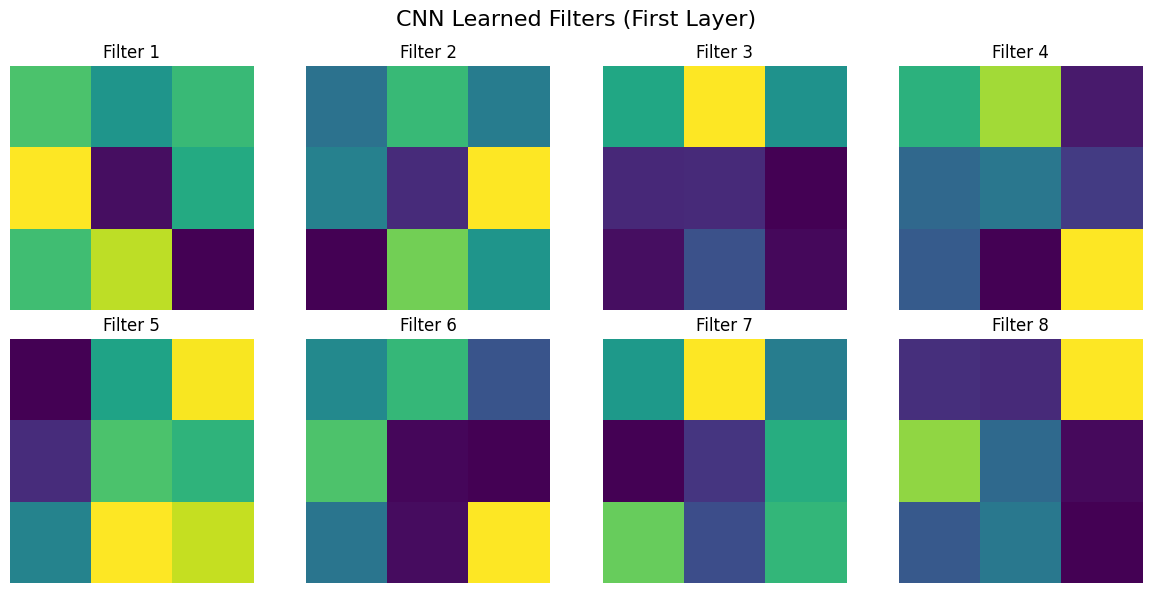

üì∏ Ïù¥ÎØ∏ÏßÄÎ•º ÏóÖÎ°úÎìúÌï¥Ï£ºÏÑ∏Ïöî!


Saving car.jpg to car (2).jpg


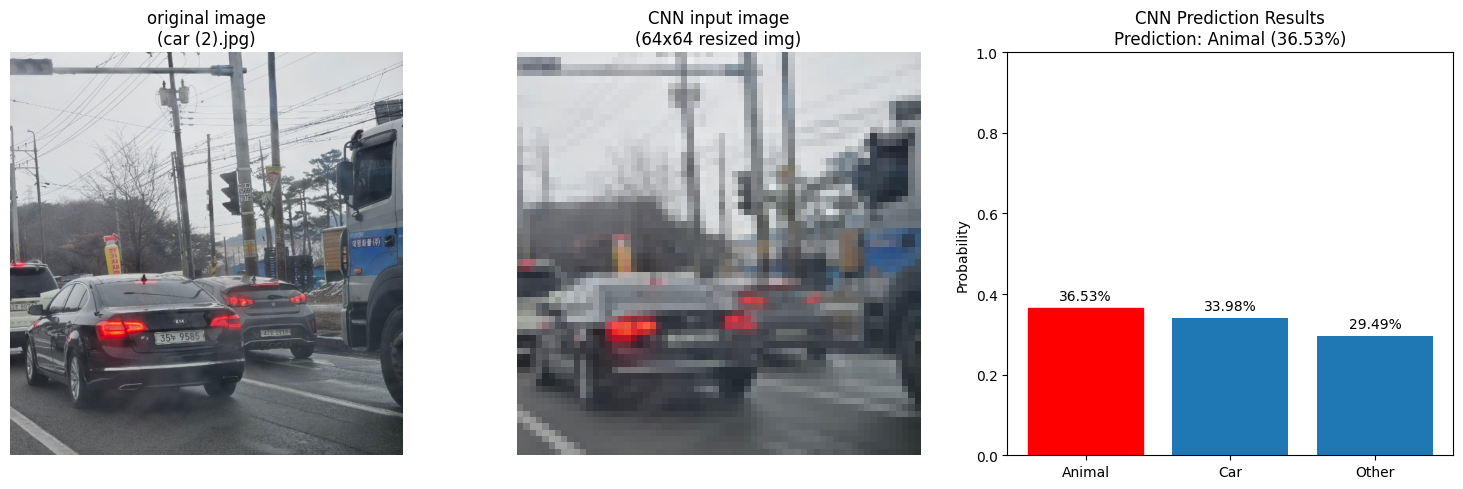


üéØ CNN Prediction Results:
üëâ Animal: 36.53%
   Car: 33.98%
   Other: 29.49%
Final Prediction: Animal (Confidence: 36.53%)

üî¨ CNN ÎÇ¥Î∂Ä ÏûëÎèô Í≥ºÏ†ï ÏãúÍ∞ÅÌôî...
‚ö†Ô∏è ÌôúÏÑ±Ìôî ÏãúÍ∞ÅÌôî Ï§ë Ïò§Î•ò Î∞úÏÉù: The layer sequential_3 has never been called and thus has no defined input.
üí° Ïù¥Îäî Î™®Îç∏ Íµ¨Ï°∞ÎÇò TensorFlow Î≤ÑÏ†Ñ Ïù¥ÏäàÏùº Ïàò ÏûàÏäµÎãàÎã§.
üìù Ï£ºÏöî Í∏∞Îä•(ÏòàÏ∏°)ÏùÄ Ï†ïÏÉÅ ÏûëÎèôÌï©ÎãàÎã§!

üéì CNN Îç∞Î™® ÏôÑÎ£å!
üí° Ïù¥Ï†ú CNNÏù¥ Ïñ¥ÎñªÍ≤å Ïù¥ÎØ∏ÏßÄÎ•º 'Ïù¥Ìï¥'ÌïòÎäîÏßÄ Î≥¥ÏÖ®ÏäµÎãàÎã§!


In [15]:
# üéÆ Î©îÏù∏ Ïã§Ìñâ Ìï®Ïàò
def run_cnn_demo():
    """
    CNN ÍµêÏú°Ïö© Îç∞Î™® Î©îÏù∏ Ïã§Ìñâ
    """
    print("üéâ ÏßÑÏßú CNN ÍµêÏú°Ïö© Îç∞Î™® ÏãúÏûë!")
    print("=" * 50)

    # 1. CNN Î™®Îç∏ ÏÉùÏÑ±
    model = create_simple_cnn()

    # 2. Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏
    visualize_model_architecture(model)

    # 3. Îπ†Î•∏ ÌõàÎ†® (Îç∞Î™®Ïö©)
    history = quick_train_with_dummy_data(model)

    # 4. ÌïôÏäµÎêú ÌïÑÌÑ∞ ÏãúÍ∞ÅÌôî
    visualize_cnn_filters(model)

    # 5. Ïù¥ÎØ∏ÏßÄ ÏóÖÎ°úÎìú Î∞è ÏòàÏ∏°
    original_img, processed_img, image_batch, filename = upload_and_preprocess_image()

    # 6. CNN ÏòàÏ∏° Î∞è Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    predict_and_visualize(model, original_img, processed_img, image_batch, filename)

    # 7. CNN ÎÇ¥Î∂Ä ÏûëÎèô Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
    visualize_intermediate_activations(model, image_batch)

    print("\nüéì CNN Îç∞Î™® ÏôÑÎ£å!")
    print("üí° Ïù¥Ï†ú CNNÏù¥ Ïñ¥ÎñªÍ≤å Ïù¥ÎØ∏ÏßÄÎ•º 'Ïù¥Ìï¥'ÌïòÎäîÏßÄ Î≥¥ÏÖ®ÏäµÎãàÎã§!")

# üöÄ Îç∞Î™® Ïã§Ìñâ
print("üìö CNN ÍµêÏú°Ïö© Îç∞Î™® - Ïã§Ï†ú Ïã†Í≤ΩÎßùÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò Ï≤¥Ìóò")
print("üî• Ïù¥Î≤àÏóêÎäî ÏßÑÏßú CNNÏûÖÎãàÎã§!")
print()
run_cnn_demo()

TensorFlow Î™®Îç∏ÏùÄ Ï≤´ Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌÜµÍ≥ºÌï¥Ïïº ÏôÑÏ†ÑÌûà Ï¥àÍ∏∞ÌôîÎê®

üß† CNN Íµ¨Ï°∞ÏôÄ ÎèôÏûë Í≥ºÏ†ï ÏôÑÏ†Ñ Ï†ïÎ¶¨ (ÌôïÏû•Ìåê)
üìã 1. CNN Î™®Îç∏ Ï†ÑÏ≤¥ Íµ¨Ï°∞
üèóÔ∏è Î†àÏù¥Ïñ¥ Íµ¨ÏÑ±
Sequential([
    # Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù 1
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2, 2),

    # Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù 2  
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    # Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù 3
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    # Î∂ÑÎ•òÍ∏∞
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Animal/Car/Other
])
üî¢ 2. ÌïÑÌÑ∞ Í∞úÏàò Ï¥ùÏ†ïÎ¶¨
Î†àÏù¥Ïñ¥   ÌïÑÌÑ∞ Í∞úÏàò   ÌïÑÌÑ∞ ÌÅ¨Í∏∞   Ï∂úÎ†• ÌäπÏßïÎßµ
Conv2D #1   16Í∞ú   3√ó3   16Í∞ú
Conv2D #2   32Í∞ú   3√ó3   32Í∞ú
Conv2D #3   64Í∞ú   3√ó3   64Í∞ú
Ï¥ù ÌïÑÌÑ∞   112Í∞ú   -   112Í∞ú
üé® ÏãúÍ∞ÅÌôî vs Ïã§Ï†ú
Ïã§Ï†ú ÏÇ¨Ïö©: 112Í∞ú ÌïÑÌÑ∞ Î™®Îëê ÌôúÎèô
ÌôîÎ©¥ ÌëúÏãú: 8Í∞úÎßå Î≥¥Ïó¨Ï§å (Í≥µÍ∞Ñ Ï†úÏïΩ)
Ïà®Í≤®ÏßÑ ÌïÑÌÑ∞: 104Í∞ú (Î≥¥Ïù¥ÏßÄ ÏïäÏßÄÎßå ÏûëÎèô Ï§ë)
‚ö° 3. ReLU ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÅÏö©
üî• ReLUÍ∞Ä Ï†ÅÏö©ÎêòÎäî ÏúÑÏπò
Conv2D #1: Í∞Å ÌïÑÌÑ∞ÎßàÎã§ ‚Üí 16Î≤à
Conv2D #2: Í∞Å ÌïÑÌÑ∞ÎßàÎã§ ‚Üí 32Î≤à
Conv2D #3: Í∞Å ÌïÑÌÑ∞ÎßàÎã§ ‚Üí 64Î≤à
Dense: Í∞Å Îâ¥Îü∞ÎßàÎã§ ‚Üí 128Î≤à
Ï¥ù ReLU Ïó∞ÏÇ∞: 240Í∞ú ÏúÑÏπòÏóêÏÑú ÌôúÏÑ±Ìôî

üîÑ 4. Îç∞Ïù¥ÌÑ∞ ÌùêÎ¶Ñ (Forward Pass)
üì∏ Ïù¥ÎØ∏ÏßÄ 1Ïû•Ïùò Ïó¨Ìñâ
1Ô∏è‚É£ ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ: (64, 64, 3)
    ‚Üì Conv2D(16 filters) + ReLU
    Ï∂úÎ†•: (62, 62, 16) ‚Üê 16Í∞ú ÌäπÏßïÎßµ
    ‚Üì MaxPooling2D
    Ï∂úÎ†•: (31, 31, 16)

2Ô∏è‚É£ ‚Üì Conv2D(32 filters) + ReLU  
    Ï∂úÎ†•: (29, 29, 32) ‚Üê 32Í∞ú ÌäπÏßïÎßµ
    ‚Üì MaxPooling2D
    Ï∂úÎ†•: (14, 14, 32)

3Ô∏è‚É£ ‚Üì Conv2D(64 filters) + ReLU
    Ï∂úÎ†•: (12, 12, 64) ‚Üê 64Í∞ú ÌäπÏßïÎßµ
    ‚Üì MaxPooling2D
    Ï∂úÎ†•: (6, 6, 64)

4Ô∏è‚É£ ‚Üì Flatten
    Ï∂úÎ†•: (2,304,) ‚Üê 1Ï∞®Ïõê Î≥ÄÌôò
    ‚Üì Dense(128) + ReLU
    Ï∂úÎ†•: (128,)
    ‚Üì Dropout(0.5)
    ‚Üì Dense(3) + Softmax
    ÏµúÏ¢Ö: (3,) ‚Üí [AnimalÌôïÎ•†, CarÌôïÎ•†, OtherÌôïÎ•†]
üìä 5. Ïó∞ÏÇ∞Îüâ Í≥ÑÏÇ∞
üî¢ Ïù¥ÎØ∏ÏßÄ 1Ïû• Ï≤òÎ¶¨ Ïãú
Ïª®Î≥ºÎ£®ÏÖò Ïó∞ÏÇ∞: 97,632Î≤à
ReLU ÌôúÏÑ±Ìôî: 97,760Î≤à
MaxPooling: 3Î≤à
Dense Ïó∞ÏÇ∞: 2Î≤à
Ï¥ù Ïó∞ÏÇ∞: ÏïΩ 10Îßå Î≤à
üéì Ï†ÑÏ≤¥ ÌõàÎ†® Ïãú (200ÏÉòÌîå √ó 3epochs)
Ï≤òÎ¶¨ Ïù¥ÎØ∏ÏßÄ: 600Ïû•
Ï¥ù Ïª®Î≥ºÎ£®ÏÖò: 58,579,200Î≤à
Ï¥ù ReLU: 58,656,000Î≤à
Ï¥ù Ïó∞ÏÇ∞: ÏïΩ 6Ï≤úÎßå Î≤à
üî• 6. ÌïÑÌÑ∞ Í∞úÏàò Ï¶ùÍ∞Ä Ìå®ÌÑ¥: 16‚Üí32‚Üí64
üß† Ïôú 2Î∞∞Ïî© Ï¶ùÍ∞ÄÌïòÎäîÍ∞Ä?
üìè Í≥µÍ∞Ñ vs ÌäπÏßïÏùò Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ
ÏûÖÎ†•: (64√ó64√ó3)   ‚Üí ÌÅ∞ Ïù¥ÎØ∏ÏßÄ, Í∏∞Î≥∏ Ï†ïÎ≥¥
  ‚Üì Conv2D(16) + MaxPool
Ï∂úÎ†•: (31√ó31√ó16)  ‚Üí Ï§ëÍ∞Ñ ÌÅ¨Í∏∞, Í∏∞Î≥∏ ÌäπÏßïÎì§
  ‚Üì Conv2D(32) + MaxPool  
Ï∂úÎ†•: (14√ó14√ó32)  ‚Üí ÏûëÏùÄ ÌÅ¨Í∏∞, Î≥µÏû°Ìïú ÌäπÏßïÎì§
  ‚Üì Conv2D(64) + MaxPool
Ï∂úÎ†•: (6√ó6√ó64)    ‚Üí Îß§Ïö∞ ÏûëÏùå, Í≥†ÏàòÏ§Ä ÌäπÏßïÎì§
üéØ Í≥ÑÏ∏µÏ†Å ÌäπÏßï ÌïôÏäµ
Î†àÏù¥Ïñ¥   ÌïÑÌÑ∞ Í∞úÏàò   Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞   ÌïôÏäµÌïòÎäî ÌäπÏßï   ÏòàÏãú
1Ï∏µ   16Í∞ú   ÌÅ∞ (31√ó31)   üìå Í∏∞Î≥∏ ÏöîÏÜå   ÏÑ†, Ïó£ÏßÄ, ÏÉâÏÉÅ
2Ï∏µ   32Í∞ú   Ï§ëÍ∞Ñ (14√ó14)   üìå Ï°∞Ìï© Ìå®ÌÑ¥   Î™®ÏÑúÎ¶¨, ÌÖçÏä§Ï≤ò, Í≥°ÏÑ†
3Ï∏µ   64Í∞ú   ÏûëÏùÄ (6√ó6)   üìå Í≥†ÏàòÏ§Ä ÌäπÏßï   Îàà, Î∞îÌÄ¥, Í∑Ä Îì±
üî¨ ÎèôÎ¨º ÏÇ¨ÏßÑ Î∂ÑÏÑù Ïã§Ï†ú ÏòàÏãú
1Ï∏µ (16Í∞ú ÌïÑÌÑ∞): Í∏∞Î≥∏ ÏöîÏÜå Í≤ÄÏ∂ú
ÌïÑÌÑ∞1: ÏÑ∏Î°ú ÏÑ† Í≤ÄÏ∂ú |
ÌïÑÌÑ∞2: Í∞ÄÎ°ú ÏÑ† Í≤ÄÏ∂ú ‚îÄ
ÌïÑÌÑ∞3: ÎåÄÍ∞ÅÏÑ† Í≤ÄÏ∂ú / \
ÌïÑÌÑ∞4-16: Îã§ÏñëÌïú Î∞©Ìñ•Ïùò Ïó£ÏßÄÎì§
2Ï∏µ (32Í∞ú ÌïÑÌÑ∞): Ìå®ÌÑ¥ Ï°∞Ìï©
ÌïÑÌÑ∞1: Îë•Í∑º Î™®Ïñë Í≤ÄÏ∂ú (Îàà ÌõÑÎ≥¥?)
ÌïÑÌÑ∞2: ÏßÅÏÑ† Ï°∞Ìï© (Îã§Î¶¨ ÌõÑÎ≥¥?)
ÌïÑÌÑ∞3: Í≥°ÏÑ† Ìå®ÌÑ¥ (Íº¨Î¶¨ ÌõÑÎ≥¥?)
ÌïÑÌÑ∞4-32: Îçî Î≥µÏû°Ìïú ÌòïÌÉú Ï°∞Ìï©Îì§
3Ï∏µ (64Í∞ú ÌïÑÌÑ∞): ÏôÑÏ†ÑÌïú ÌäπÏßï
ÌïÑÌÑ∞1: ÏôÑÏ†ÑÌïú Îàà Î™®Ïñë
ÌïÑÌÑ∞2: ÎèôÎ¨º Í∑Ä ÌòïÌÉú
ÌïÑÌÑ∞3: Îã§Î¶¨ Ï†ÑÏ≤¥ Î™®Ïñë
ÌïÑÌÑ∞4-64: ÎèôÎ¨ºÏùò Í∞Å Î∂ÄÏúÑÎì§
üî¢ Ïôú 2Ïùò Í±∞Îì≠Ï†úÍ≥±Ïù∏Í∞Ä?
üìê ÌëúÏ§Ä CNN ÏÑ§Í≥Ñ ÏõêÏπô
Ïª¥Ìì®ÌÑ∞ ÏπúÌôîÏ†Å: 2ÏßÑÎ≤ï ÏãúÏä§ÌÖú ÏµúÏ†ÅÌôî
Î©îÎ™®Î¶¨ Ìö®Ïú®: GPU Î©îÎ™®Î¶¨ Î∏îÎ°ùÍ≥º ÏùºÏπò
ÏàòÌïôÏ†Å Ìé∏Ïùò: ÌñâÎ†¨ Ïó∞ÏÇ∞ ÏµúÏ†ÅÌôî
Í≤ÄÏ¶ùÎêú Ìå®ÌÑ¥: ÏàòÎßéÏùÄ Ïó∞Íµ¨Î°ú ÏûÖÏ¶ù
üé™ Îã§Î•∏ Ìå®ÌÑ¥Í≥ºÏùò ÎπÑÍµê
# ÌëúÏ§Ä Ìå®ÌÑ¥ (Ï∂îÏ≤ú)
model_A = [16, 32, 64]    # Ïö∞Î¶¨ ÏΩîÎìú
ÏÑ±Îä•: ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê
üèóÔ∏è Ï†ïÎ≥¥ Î≥¥Ï°¥ Î≤ïÏπô
Í≥µÍ∞Ñ Ìï¥ÏÉÅÎèÑ ‚Üì √ó ÌäπÏßï Ìï¥ÏÉÅÎèÑ ‚Üë = Ï†ïÎ≥¥Îüâ Ïú†ÏßÄ
üìä Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ Î∂ÑÏÑù
1Ï∏µ: 31√ó31√ó16 = 15,376Í∞ú Í∞í (ÎÑìÍ≥† ÏñïÏùå)
2Ï∏µ: 14√ó14√ó32 = 6,272Í∞ú Í∞í (Ï§ëÍ∞Ñ)  
3Ï∏µ: 6√ó6√ó64 = 2,304Í∞ú Í∞í (Ï¢ÅÍ≥† ÍπäÏùå)
Í∞Å Îã®Í≥ÑÏóêÏÑú Ï†ïÎ≥¥Îäî ÏïïÏ∂ïÎêòÏßÄÎßå ÏùòÎØ∏Îäî Îçî ÌíçÎ∂ÄÌï¥ÏßëÎãàÎã§!

üí° 7. Í±¥Ï∂ïÎ¨º ÎπÑÏú†Î°ú Ïù¥Ìï¥ÌïòÍ∏∞
üè¢ CNN = Ï†ïÎ≥¥ Ï≤òÎ¶¨ Í≥µÏû•
üè¢ 1Ï∏µ (ÎÑìÏùÄ Í≥µÍ∞Ñ, 16Î™Ö ÏßÅÏõê)
   Ïó≠Ìï†: ÏõêÏûêÏû¨(ÌîΩÏÖÄ) Í∏∞Î≥∏ Î∂ÑÎ•ò
   ÏûëÏóÖ: "Ïù¥Í±¥ ÏÑ†Ïù¥Ïïº", "Ïù¥Í±¥ ÏÉâÍπîÏù¥Ïïº"

üè¢ 2Ï∏µ (Ï§ëÍ∞Ñ Í≥µÍ∞Ñ, 32Î™Ö ÏßÅÏõê)  
   Ïó≠Ìï†: 1Ï∏µ Í≤∞Í≥ºÎ¨º Ï°∞Ìï©Ìï¥ÏÑú Î∂ÄÌíà Ï†úÏûë
   ÏûëÏóÖ: "ÏÑ†Îì§Ïù¥ Î™®Ïó¨ Î™®ÏÑúÎ¶¨", "ÏÉâÍπîÎì§Ïù¥ Î™®Ïó¨ Ìå®ÌÑ¥"

üè¢ 3Ï∏µ (ÏûëÏùÄ Í≥µÍ∞Ñ, 64Î™Ö ÏßÅÏõê)
   Ïó≠Ìï†: 2Ï∏µ Î∂ÄÌíàÎì§Î°ú ÏôÑÏ†úÌíà Ï°∞Î¶Ω
   ÏûëÏóÖ: "Î™®ÏÑúÎ¶¨+Ìå®ÌÑ¥ = Îàà", "Í≥°ÏÑ†+ÏÉâÍπî = Í∑Ä"
Ï∏µÏù¥ Ïò¨ÎùºÍ∞àÏàòÎ°ù: Í≥µÍ∞Ñ‚Üì, Ïù∏Ïõê‚Üë, Ï†ÑÎ¨∏ÏÑ±‚Üë, ÏôÑÏÑ±ÎèÑ‚Üë

üî¨ 8. ÎßùÏõêÍ≤Ω ÎπÑÏú†
üî≠ CNN = ÏßÄÎä•Ìòï ÎßùÏõêÍ≤Ω
üîç 1Îã®Í≥Ñ (Í¥ëÍ∞Å Î†åÏ¶à, 16Í∞ú ÏÑºÏÑú)
   - Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌòïÌÉú ÌååÏïÖ
   - "Î≠îÍ∞Ä ÏõÄÏßÅÏù¥Îäî Í≤å ÏûàÎÑ§"

üîç 2Îã®Í≥Ñ (Ï§ëÍ∞Ñ Î†åÏ¶à, 32Í∞ú ÏÑºÏÑú)  
   - Î∂ÄÎ∂ÑÏ†ÅÏù∏ ÌäπÏßï Ïù∏Ïãù
   - "ÌÑ∏Ïù¥ ÏûàÍ≥†, ÎÑ§ Îã§Î¶¨Í∞Ä ÏûàÎÑ§"

üîç 3Îã®Í≥Ñ (Ï§å Î†åÏ¶à, 64Í∞ú ÏÑºÏÑú)
   - Ï†ïÎ∞ÄÌïú ÏãùÎ≥Ñ
   - "Ïù¥Í±¥ Í≥†ÏñëÏù¥ ÏñºÍµ¥Ïù¥Ïïº!"
üéØ 9. ÌïµÏã¨ Ìè¨Ïù∏Ìä∏
‚úÖ Ïã§Ï†ú CNNÏùò ÌäπÏßï
112Í∞ú ÌïÑÌÑ∞ Î™®Îëê ÎèôÏãúÏóê ÏûëÎèô
Í≥ÑÏ∏µÏ†Å ÌïôÏäµ: Îã®Ïàú‚ÜíÎ≥µÏû°‚ÜíÍ≥†ÏàòÏ§Ä
Ï†ïÎ≥¥ ÏïïÏ∂ï: Í≥µÍ∞Ñ‚Üì, ÏùòÎØ∏‚Üë
ÌòëÏóÖ Íµ¨Ï°∞: Í∞Å Ï∏µÏù¥ Îã§Ïùå Ï∏µÏùÑ ÎèÑÏõÄ
üñºÔ∏è ÏãúÍ∞ÅÌôîÏùò ÌïúÍ≥Ñ
ÌôîÎ©¥ Ï†úÏïΩÏúºÎ°ú ÏùºÎ∂ÄÎßå ÌëúÏãú
Ïã§Ï†ú ÏÑ±Îä•Í≥º Î≥¥Ïù¥Îäî Í≤ÉÏùÄ Î≥ÑÍ∞ú
Ïà®Í≤®ÏßÑ ÎåÄÎ∂ÄÎ∂ÑÏù¥ ÏßÑÏßú ÏùºÍæº
üß† ÌïôÏäµ Í≥ºÏ†ï
Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏: 112Í∞ú ÌïÑÌÑ∞ Î™®Îëê
Ïó≠Ï†ÑÌåå: Î™®Îì† Î†àÏù¥Ïñ¥ ÌÜµÍ≥º
ÌäπÏßï ÌïôÏäµ: ÏûêÎèôÏúºÎ°ú ÏµúÏ†Å Ìå®ÌÑ¥ Î∞úÍ≤¨
Îã®Í≥ÑÏ†Å Î∞úÏ†Ñ: Í∏∞Ï¥à‚ÜíÏùëÏö©‚ÜíÏôÑÏÑ±
üéâ 10. ÏµúÏ¢Ö ÏôÑÏ†Ñ Ï†ïÎ¶¨
üîÑ ÌïÑÌÑ∞ Ï¶ùÍ∞Ä Ìå®ÌÑ¥Ïùò ÌïµÏã¨
16‚Üí32‚Üí64 = "ÎÑìÍ≤å Î≥¥Í≥†, ÍπäÍ≤å ÌååÍ≥†, Ï†ïÌôïÌûà ÎßûÏ∂òÎã§"

üß© Ï†ÑÏ≤¥ ÏãúÏä§ÌÖúÏùò ÌòëÏóÖ
16Í∞ú ÌïÑÌÑ∞: Í∏∞Ï¥à Í≥µÏÇ¨ (Ïó£ÏßÄ, ÏÉâÏÉÅ)
32Í∞ú ÌïÑÌÑ∞: Í≥®Ï°∞ ÏÑ∏Ïö∞Í∏∞ (Ìå®ÌÑ¥, ÌòïÌÉú)
64Í∞ú ÌïÑÌÑ∞: ÎßàÎ¨¥Î¶¨ ÏûëÏóÖ (ÏôÑÏ†ÑÌïú ÌäπÏßï)
Dense Î†àÏù¥Ïñ¥: ÏµúÏ¢Ö ÌåêÎã® (Î∂ÑÎ•ò Í≤∞Ï†ï)
üíé CNNÏùò ÏßÄÌòú
Í≥ÑÏ∏µÏ†Å ÏÇ¨Í≥†: Îã®Í≥ÑÎ≥ÑÎ°ú Î≥µÏû°Ìï¥Ïßê
Ìö®Ïú®Ï†Å ÏÑ§Í≥Ñ: 2Ïùò Í±∞Îì≠Ï†úÍ≥± Ìå®ÌÑ¥
Ï†ïÎ≥¥ Î≥ÄÌôò: Í≥µÍ∞ÑÏ†ïÎ≥¥ ‚Üí ÏùòÎØ∏Ï†ïÎ≥¥
ÏßëÎã® ÏßÄÎä•: 112Í∞ú ÌïÑÌÑ∞Ïùò ÌòëÏóÖ
Ïù¥ Î™®Îì† Í≤ÉÏù¥ Ìï©Ï≥êÏ†∏ÏÑú Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏùÑ Î≥¥Í≥† "Ïù¥Í±¥ ÎèôÎ¨ºÏù¥Ïïº!"ÎùºÍ≥† ÎßêÌï† Ïàò ÏûàÎäî Ïù∏Í≥µÏßÄÎä•Ïù¥ ÎêòÎäî Í≤ÉÏûÖÎãàÎã§! üöÄ‚ú®üß†